### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

### Solution

In [1]:
## Import the Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Load the datsets
train= pd.read_csv('train_ctrUa4K.csv')
train.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Missing Value Treatment

In [4]:
## Count of Coumnwise null values 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Total no. of missing values
train.isnull().sum().sum()

149

In [6]:
# Missing values in Gender Column
train.Gender.isnull().sum()

13

In [7]:
# No. of genderwise counts 
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
# Relationship between Gender and Loan_Status
pd.crosstab(index= train.Gender , columns= train.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


#### Observation- Since, most of the applicants are male, so, we will fill the null values by 'Male'.

In [9]:
train[train['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [10]:
## Replacement of null values in Gender column
train['Gender'].replace(np.nan, 'Male', inplace= True)

In [11]:
## Checking the null values in gender column
train['Gender'].isnull().sum()

0

In [12]:
# No. of genderwise counts after imputing missing values
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [13]:
## Again Checking the columns having null values
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
## Married Status of the given data
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
# Relationship between Gender and Loan_Status
pd.crosstab(index= train['Married'], columns= train['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


#### Observation- Since, only most of the people are married. So, we will fill the null values by 'Yes' in Married Column.

In [16]:
train[train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [17]:
# Replacement of null values in Married Column
train['Married'].replace(np.nan, 'Yes', inplace= True)

In [18]:
# Checking null values in Married Column
train['Married'].isnull().sum()

0

In [19]:
## Again checking the columns having null values
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
## Missing values deal in dependents column
pd.crosstab(index= train['Dependents'], columns= train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


#### Observation- Most of the people are those which has no dependents.

In [23]:
train[train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [24]:
# Replacement of null values with 0 dependents
train['Dependents'].replace(np.nan, '0', inplace= True)

In [25]:
train['Dependents'].isnull().sum()

0

In [26]:
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
# Again Check the columns having null values 
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# Deal with Self_Employed column null values
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
# Relationship between Self_Employed and Loan_Status
pd.crosstab(index= train['Self_Employed'], columns= train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


#### Observation- Most of the applicants are not self-employed. So, we will fill the null values by 'No' in Self_Employed column.

In [30]:
train[train['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [31]:
# Replacement of null values in Self_Employed Column
train['Self_Employed'].replace(np.nan, 'No', inplace= True)

In [32]:
train['Self_Employed'].isnull().sum()

0

In [33]:
# Again Check the columns having null values
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
# Relationship between Loan_Amount_Term and Loan_Status 
pd.crosstab(index= train['Loan_Amount_Term'], columns= train['Loan_Status'])

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,153,359


#### Observation- Most of the Loan Amount Term is 360 months. So we will fill the null values by 360.

In [36]:
train[train['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [37]:
# Replacement of null values in Loan_Amount_Term column
train['Loan_Amount_Term'].replace(np.nan, 360, inplace= True)

In [38]:
train['Loan_Amount_Term'].isnull().sum()

0

In [39]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [40]:
# Again Check the columns having null values
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# Relationship between Credit_History and Loan_Status
pd.crosstab(index= train['Credit_History'], columns= train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [42]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### Observation- From above contingency table, we can conclude that most of the people have good credit history as '1'.

In [43]:
train['Credit_History'].isnull().sum()

50

In [44]:
# To find no. of rows having credit history as null and loan status as 'No'
train[(train['Credit_History'].isnull()) & (train['Loan_Status']=='N')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N
181,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N
236,LP001786,Male,Yes,0,Graduate,No,5746,0.0,255.0,360.0,NaN,Urban,N
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N
449,LP002444,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,NaN,Semiurban,N
503,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N


#### Observation- From the above table, we can colnclude that there are only 13 null values in credit history. So, we can fill these 5 values by '1'.

In [45]:
train['Credit_History'].replace(np.nan, 1, inplace= True)

In [46]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

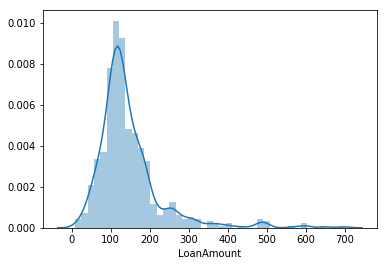

In [47]:
# Dealing null values in Loan amount column
sns.distplot(train[train['LoanAmount'].notnull()]['LoanAmount'])

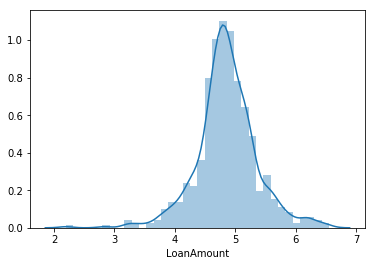

In [48]:
# Transformation of Loan Amount Column
sns.distplot(np.log(train[train['LoanAmount'].notnull()]['LoanAmount']))

In [49]:
train[train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [50]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059383,0.011134
LoanAmount,0.570909,0.188619,1.000000,0.036981,-0.001463
Loan_Amount_Term,-0.046531,-0.059383,0.036981,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001463,-0.004705,1.000000


#### Observation- From correlation table, we can infer that Loan_Amount is mostly dependent on ApplicantIncome.

In [51]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [52]:
train[((train['ApplicantIncome']>0)&(train['ApplicantIncome']<4000))].isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           12
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
train[((train['ApplicantIncome']>0)&(train['ApplicantIncome']<4000)) & train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
305,LP001990,Male,No,0,Not Graduate,No,2000,0.0,NaN,360.0,1.0,Urban,N
322,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural,Y
338,LP002113,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban,N
387,LP002243,Male,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban,N
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,N


In [54]:
train[((train['ApplicantIncome']>0)&(train['ApplicantIncome']<4000))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,331.000000,331.000000,319.000000,331.000000,331.000000
mean,2851.283988,1984.912145,113.724138,341.691843,0.845921
std,721.944423,3488.300016,42.450775,67.270521,0.361571
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2400.000000,0.000000,90.000000,360.000000,1.000000
50%,2947.000000,1700.000000,111.000000,360.000000,1.000000
75%,3416.500000,2447.000000,135.000000,360.000000,1.000000
max,3993.000000,41667.000000,350.000000,480.000000,1.000000


In [55]:
train.iloc[35,8]=111.0
train.iloc[81,8]=111.0
train.iloc[127,8]=111.0
train.iloc[202,8]=111.0
train.iloc[305,8]=111.0
train.iloc[322,8]=111.0
train.iloc[338,8]=111.0
train.iloc[387,8]=111.0
train.iloc[437,8]=111.0
train.iloc[479,8]=111.0
train.iloc[551,8]=111.0
train.iloc[605,8]=111.0

In [56]:
train[((train['ApplicantIncome']>0)&(train['ApplicantIncome']<4000))].isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
train[((train['ApplicantIncome']>4000)&(train['ApplicantIncome']<5000))].isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           3
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
train[((train['ApplicantIncome']>4000)&(train['ApplicantIncome']<5000))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,84.000000,84.000000,81.000000,84.000000,84.000000
mean,4477.297619,1109.392857,127.197531,341.142857,0.869048
std,272.474638,1581.334331,35.763955,67.324988,0.339374
min,4006.000000,0.000000,40.000000,12.000000,0.000000
25%,4229.000000,0.000000,110.000000,360.000000,1.000000
50%,4507.000000,0.000000,125.000000,360.000000,1.000000
75%,4692.750000,1998.250000,148.000000,360.000000,1.000000
max,4950.000000,7210.000000,255.000000,480.000000,1.000000


In [59]:
train[((train['ApplicantIncome']>4000)&(train['ApplicantIncome']<5000)) & train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N


In [60]:
train.iloc[63,8]=125.0
train.iloc[103,8]=125.0
train.iloc[524,8]=125.0

In [61]:
train[((train['ApplicantIncome']>4000)&(train['ApplicantIncome']<5000))].isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
train[((train['ApplicantIncome']>5000)&(train['ApplicantIncome']<14000))].isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
train[((train['ApplicantIncome']>5000)&(train['ApplicantIncome']<14000))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,159.000000,159.000000,153.000000,159.000000,159.000000
mean,7418.836478,1285.974843,189.437908,342.415094,0.867925
std,2072.866711,2211.602188,79.906428,58.753325,0.339643
min,5042.000000,0.000000,26.000000,60.000000,0.000000
25%,5818.500000,0.000000,136.000000,360.000000,1.000000
50%,6540.000000,0.000000,180.000000,360.000000,1.000000
75%,8708.000000,1833.000000,218.000000,360.000000,1.000000
max,13650.000000,11300.000000,496.000000,480.000000,1.000000


In [64]:
train[((train['ApplicantIncome']>5000)&(train['ApplicantIncome']<14000)) & train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
435,LP002393,Female,Yes,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
550,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N


In [65]:
train.iloc[0,8]=180.0
train.iloc[95,8]=180.0
train.iloc[102,8]=180.0
train.iloc[113,8]=180.0
train.iloc[435,8]=180.0
train.iloc[550,8]=180.0

In [66]:
train[((train['ApplicantIncome']>5000)&(train['ApplicantIncome']<14000))].isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
train[train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N


In [68]:
train[((train['ApplicantIncome']>20500)&(train['ApplicantIncome']<20900))].isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
train[((train['ApplicantIncome']>20500)&(train['ApplicantIncome']<20900))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,2.000000,2.00000,1.0,2.0,2.0
mean,20750.000000,3333.50000,480.0,360.0,1.0
std,117.379726,4714.28091,NaN,0.0,0.0
min,20667.000000,0.00000,480.0,360.0,1.0
25%,20708.500000,1666.75000,480.0,360.0,1.0
50%,20750.000000,3333.50000,480.0,360.0,1.0
75%,20791.500000,5000.25000,480.0,360.0,1.0
max,20833.000000,6667.00000,480.0,360.0,1.0


In [70]:
train.iloc[284,8]=480.0

In [71]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.578516,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.179687,-0.059383,0.011134
LoanAmount,0.578516,0.179687,1.000000,0.038748,0.002135
Loan_Amount_Term,-0.046531,-0.059383,0.038748,1.000000,-0.004705
Credit_History,-0.018615,0.011134,0.002135,-0.004705,1.000000


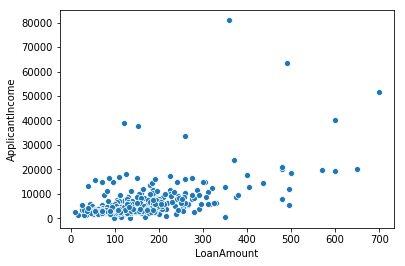

In [73]:
sns.scatterplot(x= train['LoanAmount'], y= train['ApplicantIncome'])

In [74]:
train['LoanAmount'].groupby(train['Education']).describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,480.0,154.433333,92.800186,9.0,104.0,131.5,180.00,700.0
Not Graduate,134.0,118.022388,38.748168,25.0,98.0,113.0,132.75,279.0


In [75]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,180.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
train['Education'].replace(train['Education'].unique(),[1,0],inplace=True)

In [77]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0.0,180.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
train['Gender'].replace(train['Gender'].unique(),[1,0],inplace=True)
train['Married'].replace(train['Married'].unique(),[0,1],inplace=True)
train['Self_Employed'].replace(train['Self_Employed'].unique(),[0,1],inplace=True)
train['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)

In [79]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,180.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [80]:
train2=train.copy()

In [81]:
train2['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [82]:
train2['Dependents'].replace(train2['Dependents'].unique(),[0,1,2,3],inplace=True)

In [83]:
train2['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [84]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,180.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [85]:
train['TotalIncome']= train['ApplicantIncome']+train['CoapplicantIncome']

In [86]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,1,0,5849,0.0,180.0,360.0,1.0,Urban,1,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [87]:
train.drop('Loan_ID',axis=1,inplace=True)

In [88]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,1,0,5849,0.0,180.0,360.0,1.0,Urban,1,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [89]:
dummytrain= pd.get_dummies(train)

In [90]:
dummytrain.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,180.0,360.0,1.0,1,5849.0,1,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,1,0,0,0,0,0,1


In [91]:
dummytrain.shape

(614, 18)

In [92]:
dummytrain.dtypes

Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

## Test Dataset

In [158]:
test= pd.read_csv('test_lAUu6dG.csv')

In [94]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [95]:
test.shape

(367, 12)

In [96]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [97]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [98]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [99]:
test['Gender'].replace(np.nan, 'Male', inplace= True)

In [100]:
test['Gender'].isnull().sum()

0

In [101]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [102]:
test['Dependents'].replace(np.nan, '0', inplace=True)

In [103]:
test['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [104]:
test['Dependents'].isnull().sum()

0

In [105]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [106]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [107]:
test['Self_Employed'].replace(np.nan, 'No', inplace=True)

In [108]:
test['Self_Employed'].value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [109]:
test['Self_Employed'].isnull().sum()

0

In [110]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [111]:
test[test['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,LP001232,Male,Yes,0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
48,LP001268,Male,No,0,Graduate,No,6792,3338,187.0,NaN,1.0,Urban
117,LP001611,Male,Yes,1,Graduate,No,1516,2900,80.0,NaN,0.0,Rural
129,LP001695,Male,Yes,1,Not Graduate,No,3321,2088,70.0,NaN,1.0,Semiurban
184,LP002045,Male,Yes,3+,Graduate,No,10166,750,150.0,NaN,1.0,Urban
214,LP002183,Male,Yes,0,Not Graduate,No,3754,3719,118.0,NaN,1.0,Rural


In [112]:
test['LoanAmount'].groupby(by= test['Loan_Amount_Term']).describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Amount_Term,,,,,,,,
6.0,1.0,95.000000,NaN,95.0,95.00,95.0,95.00,95.0
12.0,1.0,260.000000,NaN,260.0,260.00,260.0,260.00,260.0
36.0,1.0,118.000000,NaN,118.0,118.00,118.0,118.00,118.0
60.0,1.0,139.000000,NaN,139.0,139.00,139.0,139.00,139.0
84.0,3.0,106.333333,24.583192,83.0,93.50,104.0,118.00,132.0
120.0,1.0,80.000000,NaN,80.0,80.00,80.0,80.00,80.0
180.0,22.0,99.818182,49.017622,28.0,55.00,101.0,133.25,185.0
240.0,4.0,136.750000,95.858837,80.0,85.25,93.5,145.00,280.0
300.0,7.0,131.142857,28.765886,70.0,129.50,137.0,150.00,152.0


In [113]:
test['Loan_Amount_Term'].replace(np.nan, 360, inplace=True)

In [114]:
test['Loan_Amount_Term'].isnull().sum()

0

In [115]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [116]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [117]:
test['Credit_History'].replace(np.nan, 1, inplace=True)

In [118]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [119]:
test[test['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,LP002360,Male,Yes,0,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,LP002593,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [120]:
test.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.008633,-0.058004
LoanAmount,0.493451,0.150850,1.000000,0.094097,-0.013310
Loan_Amount_Term,0.023319,-0.008633,0.094097,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.013310,-0.048189,1.000000


In [121]:
test[((test['ApplicantIncome']>2200)&(test['ApplicantIncome']<3500))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,116.000000,116.000000,114.000000,116.000000,116.000000
mean,2853.577586,1840.827586,118.456140,341.224138,0.793103
std,376.353815,1932.760249,38.187507,71.127453,0.406838
min,2226.000000,0.000000,40.000000,6.000000,0.000000
25%,2500.000000,0.000000,91.250000,360.000000,1.000000
50%,2885.500000,1693.500000,117.500000,360.000000,1.000000
75%,3181.500000,2715.500000,138.000000,360.000000,1.000000
max,3445.000000,15000.000000,256.000000,480.000000,1.000000


In [122]:
test.iloc[78,8]=117.5
test.iloc[101,8]=117.5

In [123]:
test['LoanAmount'].isnull().sum()

3

In [124]:
test[((test['ApplicantIncome']>8100)&(test['ApplicantIncome']<8500))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.000000,3.000000,2.00000,3.0,3.0
mean,8372.000000,1333.333333,258.50000,360.0,1.0
std,66.685831,2309.401077,2.12132,0.0,0.0
min,8333.000000,0.000000,257.00000,360.0,1.0
25%,8333.500000,0.000000,257.75000,360.0,1.0
50%,8334.000000,0.000000,258.50000,360.0,1.0
75%,8391.500000,2000.000000,259.25000,360.0,1.0
max,8449.000000,4000.000000,260.00000,360.0,1.0


In [125]:
test.iloc[289,8]=258.5

In [126]:
test[((test['ApplicantIncome']>9900)&(test['ApplicantIncome']<10100))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.0,3.000000,2.000000,3.0,3.0
mean,10000.0,4785.333333,436.000000,360.0,1.0
std,0.0,6108.740077,33.941125,0.0,0.0
min,10000.0,0.000000,412.000000,360.0,1.0
25%,10000.0,1345.000000,424.000000,360.0,1.0
50%,10000.0,2690.000000,436.000000,360.0,1.0
75%,10000.0,7178.000000,448.000000,360.0,1.0
max,10000.0,11666.000000,460.000000,360.0,1.0


In [127]:
test.iloc[247,8]=436.0

In [128]:
test[((test['ApplicantIncome']>12200)&(test['ApplicantIncome']<13200))].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.000000,3.0,2.000000,3.000000,3.000000
mean,12841.333333,0.0,225.000000,340.000000,0.666667
std,304.010416,0.0,106.066017,34.641016,0.577350
min,12500.000000,0.0,150.000000,300.000000,0.000000
25%,12720.500000,0.0,187.500000,330.000000,0.500000
50%,12941.000000,0.0,225.000000,360.000000,1.000000
75%,13012.000000,0.0,262.500000,360.000000,1.000000
max,13083.000000,0.0,300.000000,360.000000,1.000000


In [129]:
test.iloc[188,8]=225.0

In [130]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [131]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [132]:
test['TotalIncome']= test['ApplicantIncome']+test['CoapplicantIncome']

In [133]:
test['Education'].replace(test['Education'].unique(),[1,0],inplace=True)
test['Gender'].replace(test['Gender'].unique(),[1,0],inplace=True)
test['Married'].replace(test['Married'].unique(),[1,0],inplace=True)
test['Self_Employed'].replace(test['Self_Employed'].unique(),[0,1],inplace=True)

In [134]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,3276


In [135]:
test.drop('Loan_ID',axis=1,inplace=True)

In [136]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,5720
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,4576
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,6800
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban,4886
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,3276


In [137]:
dummytest= pd.get_dummies(test)

In [138]:
dummytest.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,5720,0,110.0,360.0,1.0,5720,1,0,0,0,0,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1.0,4576,0,1,0,0,0,0,1
2,1,1,1,0,5000,1800,208.0,360.0,1.0,6800,0,0,1,0,0,0,1
3,1,1,1,0,2340,2546,100.0,360.0,1.0,4886,0,0,1,0,0,0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,3276,1,0,0,0,0,0,1


In [139]:
dummytest.shape

(367, 17)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [141]:
x= dummytrain.drop('Loan_Status',axis=1)
y= train.Loan_Status
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [142]:
xtrain.shape

(429, 17)

In [143]:
ytrain.shape

(429,)

In [144]:
lr = LogisticRegression()

In [145]:
lr.fit(xtrain,ytrain)

D:\Python-with-Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
ypred= lr.predict(dummytest)

In [147]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [148]:
ypred.shape

(367,)

In [149]:
df1= pd.DataFrame(ypred)

In [150]:
df1.head()

,0
0,1
1,1
2,1
3,1
4,1


In [151]:
df1.shape

(367, 1)

In [152]:
df1.rename(columns={0:'Loan_Status'},inplace=True)

In [153]:
df1['Loan_Status'].replace([1,0],['Y','N'],inplace=True)

In [154]:
df1.head(10)

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,Y


In [155]:
df1.shape

(367, 1)

In [159]:
df2= pd.DataFrame(test['Loan_ID'])

In [160]:
df2.shape

(367, 1)

In [161]:
df2.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [162]:
df= pd.DataFrame({'Loan_ID':df2.Loan_ID,'Loan_Status':df1.Loan_Status})

In [163]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [164]:
df.to_csv('Simple_Logistic_Regression_With_Train_Test_Split_With_Dummies_Variable_Without_Deleting_Income.csv',index=False)